<a href="https://colab.research.google.com/github/fazamina/Data-Mining-and-Business-Intelligence-Case-Study/blob/main/Correlation_and_Regression_(Case_Study_4_Data_Mining).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlation and Regression**
###**Case Study Data Mining and Business Intelligence**

In [ ]:
#Mengimport modul yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

In [ ]:
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv'
df = pd.read_csv(url,sep=',')
df

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
df.dtypes

meter_reading         float64
primary_use            object
square_feet             int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [ ]:
df.describe()

,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
mean,185.383188,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433
max,5072.323426,875000.000000,2017.000000,26.000000,24.963702,5.671785,17.379328,11.675633,1018.052063,207.134076,5.493939


**<h1>EDA (Exploratory Data Analysis) </h1>**

In [ ]:
#Cek persentase missing values tiap kategori
def percent_missing_val(df):

  percent_missing = (df.isnull().sum() * 100) / len(df)
  missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
  return missing_value_df
mvt = percent_missing_val(df)
mvt

,column_name,percent_missing
meter_reading,meter_reading,0.000000
primary_use,primary_use,0.000000
square_feet,square_feet,0.000000
year_built,year_built,53.078556
floor_count,floor_count,75.088464
air_temperature,air_temperature,0.000000
cloud_coverage,cloud_coverage,1.203114
dew_temperature,dew_temperature,0.000000
precip_depth_1_hr,precip_depth_1_hr,12.455768
sea_level_pressure,sea_level_pressure,6.298655


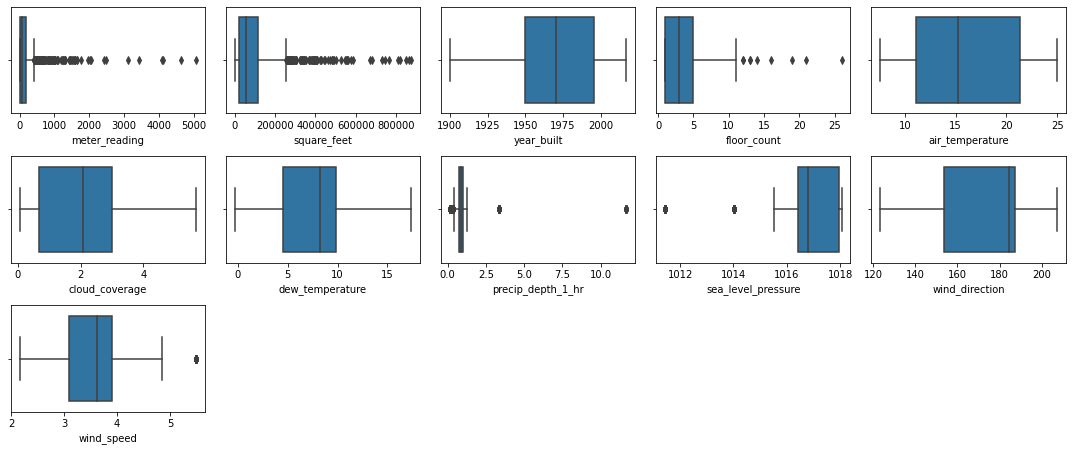

In [ ]:
#Check for outliers and skewness of distribution

plt.figure(figsize=(15,8))

for i, col in enumerate(df.describe().columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()

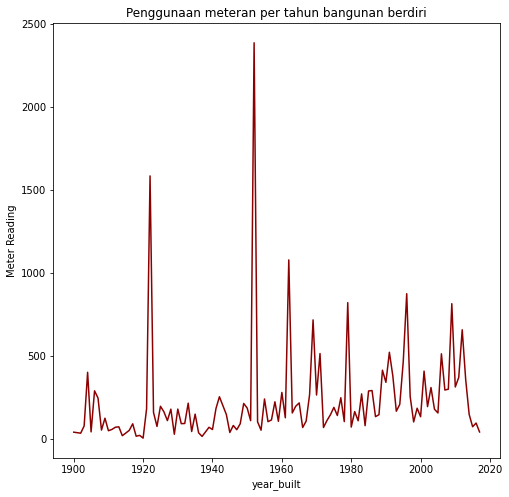

In [ ]:
plt.figure(figsize=(8,8))
year_df= df.groupby('year_built').meter_reading.mean().reset_index()
sns.lineplot(x=year_df['year_built'], y=year_df['meter_reading'], color='darkred')
plt.ylabel("Meter Reading")
plt.title("Penggunaan meteran per tahun bangunan berdiri")
plt.show()

Terlihat bahwa bangunan yang telah berdiri sejak tahun 1950 dan ke atas mengonsumsi energi lebih banyak

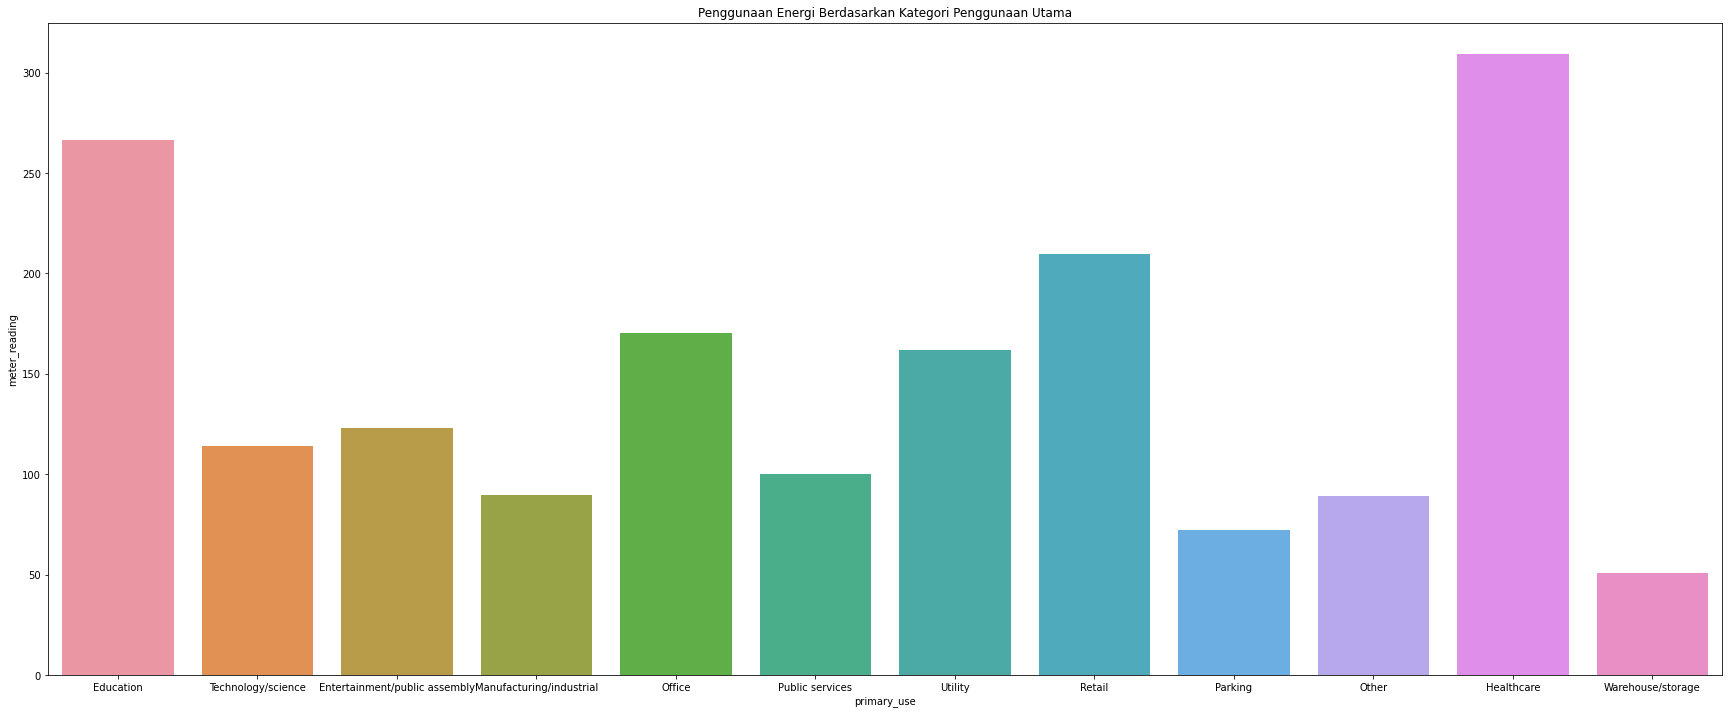

In [ ]:
order_list = ['Education', 'Technology/science', 'Entertainment/public assembly','Manufacturing/industrial', 'Office', 'Public services','Utility', 'Retail', 'Parking', 'Other', 'Healthcare', 'Warehouse/storage']
plt.figure(figsize=(30,12))
ax = sns.barplot(x= 'primary_use', y='meter_reading',data=df, ci=None,order=order_list).set(title="Penggunaan Energi Berdasarkan Kategori Penggunaan Utama")


Terlihat dari grafik bahwa penggunaan energi paling banyak digunakan pada bidang kesehatan. Oleh karena itu, pasokan energi sebaiknya disalurkan lebih banyak pada bidang kesehatan (Healthcare). 

Sedangkan, penggunaan energi paling sedikit terdapat pada bidang warehouse. Oleh karena itu, untuk bidang tersebut, pasokan energi sebaiknya dapat disalurkan lebih sedikit dibandingkan bidang lainnya.

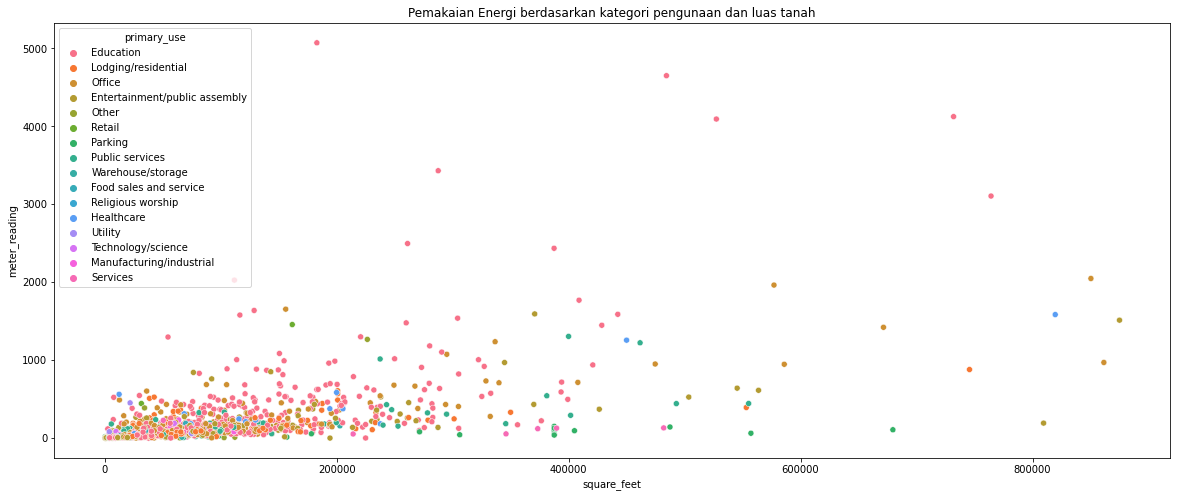

In [ ]:
#Checking Distribution Luas Tanah

plt.figure(figsize=(20,8))
ax = sns.scatterplot(data=df, y="meter_reading",x="square_feet",hue="primary_use").set(title="Pemakaian Energi berdasarkan kategori pengunaan dan luas tanah")

In [ ]:
df2 = df.dropna(subset=['floor_count'])
df2['floor_count'] = df2['floor_count'].astype(int)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
105,78.124031,Education,50623,NaN,5,12.015507,0.059266,7.578107,NaN,1015.757132,197.769373,4.013777
106,1.519550,Education,5374,NaN,4,12.015507,0.059266,7.578107,NaN,1015.757132,197.769373,4.013777
107,234.756755,Education,97532,2005.0,10,12.015507,0.059266,7.578107,NaN,1015.757132,197.769373,4.013777
108,239.155932,Education,81580,1913.0,5,12.015507,0.059266,7.578107,NaN,1015.757132,197.769373,4.013777
109,255.898231,Education,56995,1953.0,6,12.015507,0.059266,7.578107,NaN,1015.757132,197.769373,4.013777
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,25.512085,Education,28406,NaN,1,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1039,71.310180,Retail,45305,NaN,2,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1041,394.884467,Education,204998,NaN,4,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1042,69.605817,Education,86714,NaN,4,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939


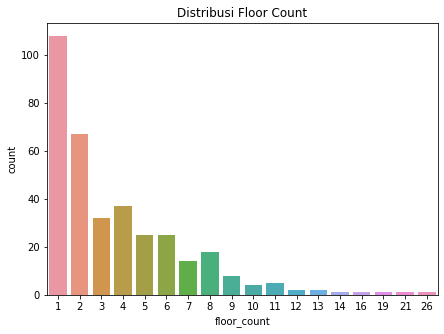

In [ ]:
#Checking Distribusi Floor Count untuk mencari tipe imputasi data tepat -> handling missing values
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df2, x="floor_count").set(title="Distribusi Floor Count")

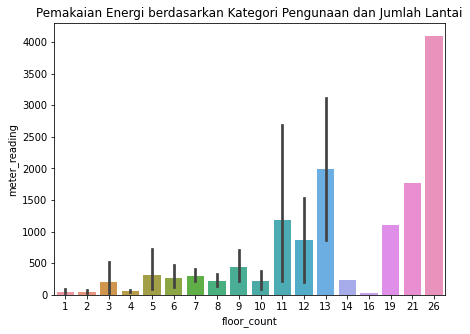

In [ ]:
#Checking Floor Count and Meter Reading Correlation

plt.figure(figsize=(7,5))
ax = sns.barplot(data=df2, y="meter_reading",x="floor_count").set(title="Pemakaian Energi berdasarkan Kategori Pengunaan dan Jumlah Lantai")

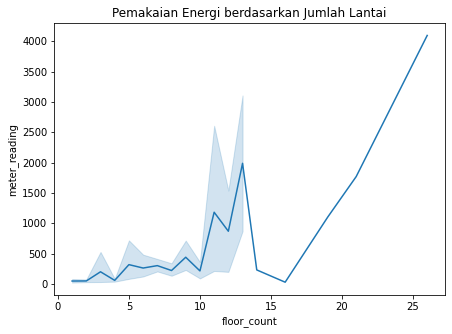

In [ ]:
#Checking Floor Count and Meter Reading Correlation (2)

plt.figure(figsize=(7,5))
ax = sns.lineplot(data=df2, y="meter_reading",x="floor_count").set(title="Pemakaian Energi berdasarkan Jumlah Lantai")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


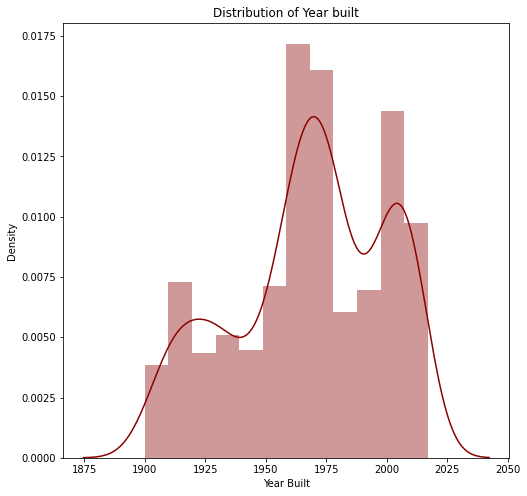

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df['year_built'].dropna(), color='darkred')
plt.xlabel("Year Built")
plt.title("Distribution of Year built")
plt.show()

Distribusi tersebar selama periode 120 tahun. Sebagian besar bangunan dibangun setelah tahun 1950.

**<h1>Correlation </h1>**

In [ ]:
corr=df.corr()

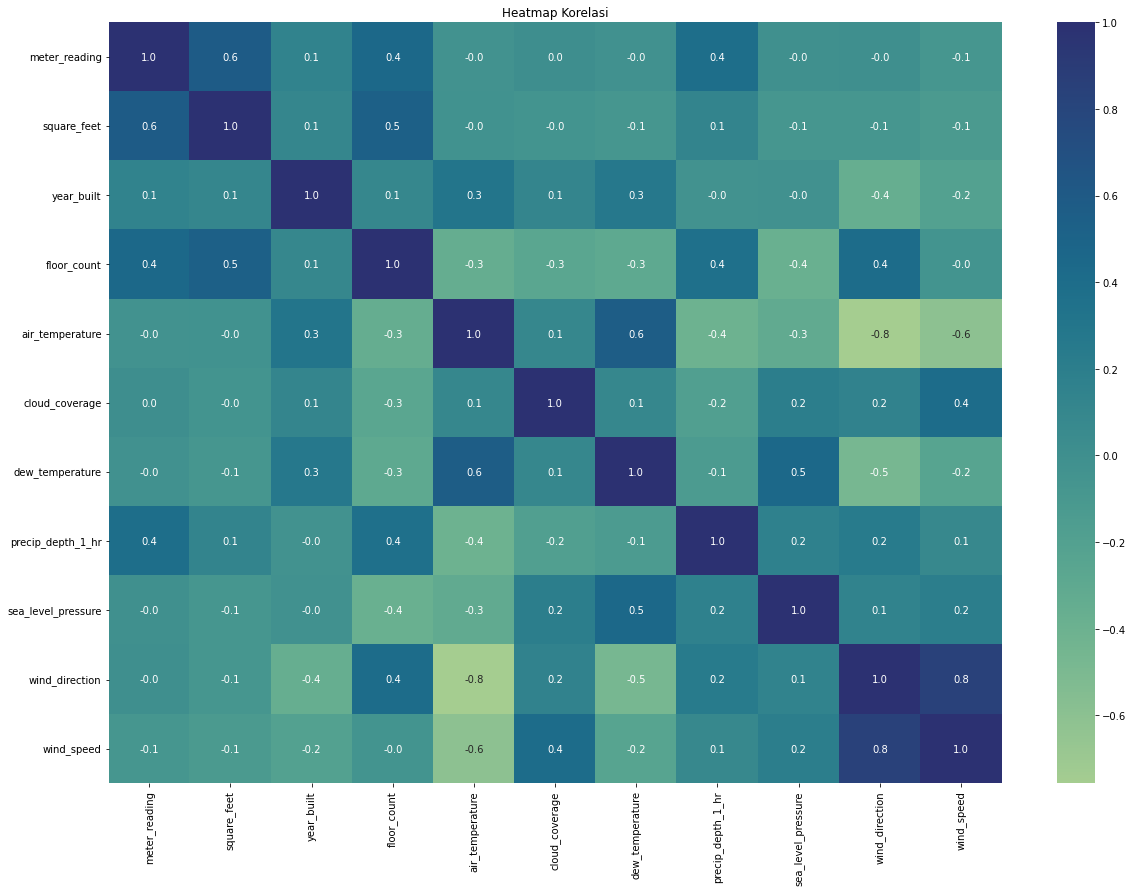

In [ ]:
plt.figure(figsize=(20,14))
ax=sns.heatmap(corr, annot=True, fmt=".1f",cmap="crest").set(title="Heatmap Korelasi")

Variabel yang memiliki korelasi kuat dengan meter reading: Square_feet (0.6)

Variabel yang memiliki korelasi sedang dengan meter reading: precip_depth_1_hr (0.4)

Variabel yang memiliki korelasi positif sangat rendah dengan meter reading: year_built (0.1)

Variabel yang memiliki korelasi negatif sangat rendah dengan meter reading: wind_speed (-0.1)

Variabel yang tidak memiliki korelasi dengan meter reading: air_temperature cloud_coverage dew_temperature sea_level_pressure wind_direction

**<h1>Regression</h1>**

### **Model 1**

Model menggunakan semua missing value

In [ ]:
res = ols(formula='meter_reading ~ primary_use + square_feet + floor_count + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', data=df).fit()
print(res.params)
print(res.summary())

Intercept                                       8.928680e-05
primary_use[T.Entertainment/public assembly]   -6.518890e+00
primary_use[T.Food sales and service]           3.238006e-14
primary_use[T.Healthcare]                      -1.566700e-13
primary_use[T.Lodging/residential]             -5.327439e+01
primary_use[T.Manufacturing/industrial]        -6.006801e-15
primary_use[T.Office]                           8.662558e+00
primary_use[T.Other]                           -2.783952e+01
primary_use[T.Parking]                         -1.451777e+02
primary_use[T.Public services]                 -3.253978e+01
primary_use[T.Religious worship]                3.392237e-15
primary_use[T.Retail]                          -3.773061e-14
primary_use[T.Services]                         1.510840e-14
primary_use[T.Technology/science]              -5.529796e+01
primary_use[T.Utility]                          7.364712e+01
primary_use[T.Warehouse/storage]               -4.460653e+01
square_feet             

Dari model dengan menggunakan semua variabel, didapat variabel yang signifikan adalah square_feet, floor_count, dan wind_direction. Artinya, ketiga variabel ini, yaitu luas bersih yang bisa dibangun, jumlah lantai, dan arah mata angin memberikan pengaruh yang signifikan terhadap konsumsi energi dalam kWh.

In [ ]:
def forward_selected(data, response):

    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model


In [ ]:
model = forward_selected(df, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + floor_count + precip_depth_1_hr + 1
0.711054556712897


Interpretasi forward selection: 
Kami tetap menggunakan variabel floor_count walaupun terdapat missing value sehingga data yang dipakai untuk regresi hanya 352 data. Berdasarkan metode slovin untuk mencari margin of error, diperoleh margin of error sebesar 4,62% dan masih tergolong rendah. Dengan demikian, dengan menggunakan data sebesar 352 data masih cukup mewakili untuk model regresi untuk data tersebut.

Sama seperti dugaan awal ketika melihat heatmap, ternyata model yang terbaik yang dihasilkan oleh function **forward_selected** adalah variabel independen:
1. square_feet
2. floor_count
3. precip_depth_1_hr

Hal ini juga didukung oleh R-squared yang cukup baik yakni sebesar 0.711

In [ ]:
res2 = ols(formula='meter_reading ~ square_feet + floor_count + precip_depth_1_hr ', data=df).fit()
print(res2.params)
print(res2.summary())

Intercept           -176.033878
square_feet            0.002482
floor_count           10.713536
precip_depth_1_hr    134.666123
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.85e-54
Time:                        09:43:38   Log-Likelihood:                -1494.1
No. Observations:                 203   AIC:                             2996.
Df Residuals:                     199   BIC:                             3009.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('meter_reading ~ square_feet + floor_count + precip_depth_1_hr', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,2.008548,Intercept
1,1.874924,square_feet
2,1.587225,floor_count
3,1.375389,precip_depth_1_hr


Dari nilai VIF yang diperoleh untuk model 1 terlihat bahwa tidak terjadi multikolinearitas karena nilai VIF < 10

###**Model 2**

Model dengan menghilangkan missing value

In [ ]:
#drop missing value
df2 = df.dropna()

In [ ]:
res3 = ols(formula='meter_reading ~ primary_use + square_feet + floor_count + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', data=df2).fit()
print(res3.params)
print(res3.summary())

Intercept                                        -0.000124
primary_use[T.Entertainment/public assembly]     20.825673
primary_use[T.Lodging/residential]             -109.362059
primary_use[T.Parking]                         -119.933055
primary_use[T.Public services]                  -82.468797
primary_use[T.Technology/science]               -23.822415
primary_use[T.Utility]                           79.973346
square_feet                                       0.001360
floor_count                                      36.918752
air_temperature                                  -0.001820
cloud_coverage                                   -0.000228
dew_temperature                                  -0.001215
precip_depth_1_hr                                -0.000054
sea_level_pressure                               -0.125642
wind_direction                                   -0.025395
wind_speed                                       -0.000468
dtype: float64
                            OLS Regressio

In [ ]:
model2 = forward_selected(df2, 'meter_reading')

print(model2.model.formula)
print(model2.rsquared_adj)

meter_reading ~ floor_count + square_feet + year_built + wind_speed + wind_direction + air_temperature + 1
0.5064634241570168


In [ ]:
res4 = ols(formula='meter_reading ~ floor_count + square_feet + year_built + wind_speed + wind_direction + air_temperature', data=df).fit()
print(res4.params)
print(res4.summary())

Intercept         -2218.911365
floor_count          -3.307748
square_feet           0.002793
year_built            0.443350
wind_speed         -663.889831
wind_direction       30.969857
air_temperature    -174.157320
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     92.78
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.36e-57
Time:                        09:43:39   Log-Likelihood:                -1663.3
No. Observations:                 228   AIC:                             3341.
Df Residuals:                     221   BIC:                             3365.
Df Model:                           6                                         
Covariance Type:            nonrobust                    

Model yang dihasilkan oleh function forward_selected adalah variabel independen dengan menghilangkan missing value:

1.   floor_count
2.   square_feet
3.   year_built
4.   wind_speed
5.   wind_direction
6.   air_temperature

Diperoleh R-squared yakni sebesar 0.506

In [ ]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('meter_reading ~ floor_count + square_feet + year_built + wind_speed + wind_direction + air_temperature', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,10888.709167,Intercept
1,2.420415,floor_count
2,2.524018,square_feet
3,1.051196,year_built
4,2.643059,wind_speed
5,1.535046,wind_direction
6,1.906582,air_temperature


Semua variabel memiliki VIF <10 sehingga tidak terjadi multikolinearitas

###**Perbandingan Kedua Model**

Berdasarkan hasil dari kedua model, model 1 (yang melibatkan missing value) memiliki nilai RSquared yang lebih besar daripada model 2 (tanpa missing value). Diperoleh nilai AIC model 1 sebesar 2996 dan nilai AIC model 2 sebesar 3341. Dengan demikian, kami memilih **model 1 sebagai model terbaik** dengan pertimbangan nilai RSquared, nilai AIC terkecil, dan jika regresi menggunakan hanya 352 berdasarkan metode slovin untuk mencari margin of error, diperoleh margin of error sebesar 4,62% dan masih tergolong rendah.

Model 1: 
meter_reading = -176.033878 + (0.002481)square_feet + (10.713536)floor_count + (134.666123) precip_depth_1_hr.


Interpretasi model terbaik
*   Setiap kenaikan pada satu unit square_feet (luas bersih yang dapat dibangun), penggunaan energi cenderung naik sebesar 0.002481 kali lipat.
*   Setiap kenaikan pada satu unit floor_count (jumlah lantai pada bangunan), penggunaan energi cenderung naik sebesar 10.713536 kali lipat.
*   Setiap kenaikan pada precip_depth_1_hr (kedalaman tebing dalam satuan milimeter), penggunaan energi cenderung naik sebesar 131.666123 kali lipat.
*   Ketika variabel square_feet (luas bersih yang dapat dibangun), floor_count (jumlah lantai pada bangunan), dan precip_depth_1_hr (kedalaman tebing dalam satuan milimeter) dianggap bernilai 0, penggunaan energi bernilai -176.033878.





#**Kesimpulan**

*   Dari hasil Exploratory Data Analysis diperoleh bahwa energi yang paling banyak digunakan untuk bangunan bidang kesehatan dan paling sedikit bidang warehouse.
*   Pemakaian energi cenderung meningkat seiring dengan jumlah lantai dan luas tanah yang semakin besar.





#**Rekomendasi**
*   Bangunanan bidang kesehatan memiliki pengunaan listrik yang paling besar. Oleh karena itu, disarankan untuk membangun bangunan dalam bidang kesehatan yang memiliki jumlah lantai dan luas tanah yang besar sekalian agar energi yang digunakan untuk setiap pengunjungan ke bangunan tersebut lebih efisien.
*   Untuk mengefisiensikan penggunaan listrik sebaiknya membangun bangunan dengan jumlah lantai sesuai dengan kebutuhannya karena pemakaian energi cenderung meningkat untuk jumlah lantai yang lebih besar. Hal tersebut juga berlaku untuk luas tanah bangunannya.
*   Berdasarkan hasil regresi dan terpilih model terbaik, untuk lebih mengefisiensikan penggunaan energi per KwH lebih dipertimbangkan lagi untuk luas pembangunan dan jumlah lantai pada bangunan, serta kedalaman tebing pada bangunan. Karena meningkat satu unit untuk variabel tersebut, akan semakin tinggi jumlah penggunaan energinya.



